# ⚠️ ⚠️ ⚠️
# **Open a new colab yourself and just copy paste the code(s) required, running in this same colab will show errors, due to cross dependencies.**

# **Practical 1**

In [4]:
!pip install paho-mqtt

import paho.mqtt.client as mqtt

# Callback when connected to the broker
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    client.subscribe("iot/test")

# Callback when a message is received
def on_message(client, userdata, msg):
    print(f"Message received: {msg.payload.decode()}")

# Create MQTT client instance
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

# Connect to public MQTT broker
client.connect("broker.hivemq.com", 1883, 60)

# Start loop to process network traffic
client.loop_start()

# Publish a test message
client.publish("iot/test", "Hello IoT")

# Stop the loop after short delay (optional in production)
import time
time.sleep(2)  # Allow time for message to be received
client.loop_stop()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.5 MB/s eta 0:00:00


<ipython-input-4-477232011ba6>:15: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


Connected with result code 0
Message received: Pressure = 966.88 hPa


<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

# **Practical 2**

In [5]:
import random
import time
import json
from datetime import datetime

# Generate sensor data for temperature, humidity, pressure, and light
def generate_sensor_data():
    data = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "temperature": round(random.uniform(20.0, 30.0), 2),     # °C
        "humidity": round(random.uniform(40.0, 60.0), 2),        # %
        "pressure": round(random.uniform(980.0, 1030.0), 2),     # hPa
        "light_intensity": round(random.uniform(0.0, 1000.0), 2) # lux
    }
    return data

# Collect sensor data for given duration and interval
def collect_sensor_data(duration, interval, output_file):
    collected_data = []
    start_time = time.time()
    print("Starting sensor data collection...\n")

    while time.time() - start_time < duration:
        data = generate_sensor_data()
        collected_data.append(data)
        print("Collected:", data)
        time.sleep(interval)

    # Save to JSON file
    with open(output_file, 'w') as f:
        json.dump(collected_data, f, indent=4)

    print(f"\nData saved to {output_file}")

# Main execution
if __name__ == "__main__":
    collect_sensor_data(duration=30, interval=5, output_file="enhanced_sensor_data.json")

Starting sensor data collection...

Collected: {'timestamp': '2025-05-02 03:19:27', 'temperature': 23.06, 'humidity': 48.56, 'pressure': 1006.53, 'light_intensity': 989.49}
Collected: {'timestamp': '2025-05-02 03:19:32', 'temperature': 22.85, 'humidity': 53.21, 'pressure': 1006.77, 'light_intensity': 877.45}
Collected: {'timestamp': '2025-05-02 03:19:37', 'temperature': 23.72, 'humidity': 59.86, 'pressure': 990.15, 'light_intensity': 397.12}
Collected: {'timestamp': '2025-05-02 03:19:42', 'temperature': 25.11, 'humidity': 56.31, 'pressure': 1024.25, 'light_intensity': 890.76}
Collected: {'timestamp': '2025-05-02 03:19:47', 'temperature': 22.88, 'humidity': 55.29, 'pressure': 1010.84, 'light_intensity': 795.58}
Collected: {'timestamp': '2025-05-02 03:19:52', 'temperature': 23.63, 'humidity': 43.93, 'pressure': 1001.81, 'light_intensity': 432.45}

Data saved to enhanced_sensor_data.json


# **Practical 3**

In [7]:
!pip install dash

from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import random, time, threading

# Simulated data store
data = {'time': [], 'temperature': [], 'humidity': [], 'air_pressure': []}

# Simulated Sensor Data Generator
def generate_sensor_data():
    while True:
        data['temperature'].append(round(random.uniform(20.0, 30.0), 2))
        data['humidity'].append(round(random.uniform(40.0, 60.0), 2))
        data['air_pressure'].append(round(random.uniform(980.0, 1050.0), 2))
        data['time'].append(time.strftime("%H:%M:%S"))

        if len(data['time']) > 100:
            for key in data:
                data[key] = data[key][-100:]

        time.sleep(1)

# Start sensor data thread
threading.Thread(target=generate_sensor_data, daemon=True).start()

# Dash App
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Real-Time IoT Sensor Dashboard", style={'textAlign': 'center'}),

    # Digital Displays
    html.Div([
        html.Div(id='temperature-digital', style={'fontSize': '30px', 'margin': '10px'}),
        html.Div(id='humidity-digital', style={'fontSize': '30px', 'margin': '10px'}),
        html.Div(id='air-pressure-digital', style={'fontSize': '30px', 'margin': '10px'})
    ], style={'display': 'flex', 'justifyContent': 'space-around'}),

    # Graphs
    html.Div([
        dcc.Graph(id='temperature-graph'),
        dcc.Graph(id='humidity-graph'),
        dcc.Graph(id='air-pressure-graph')
    ]),

    dcc.Interval(id='interval-component', interval=1000, n_intervals=0)
])

@app.callback(
    [Output('temperature-graph', 'figure'),
     Output('humidity-graph', 'figure'),
     Output('air-pressure-graph', 'figure'),
     Output('temperature-digital', 'children'),
     Output('humidity-digital', 'children'),
     Output('air-pressure-digital', 'children')],
    [Input('interval-component', 'n_intervals')]
)
def update_dashboard(n):
    temp_fig = go.Figure([go.Scatter(x=data['time'], y=data['temperature'], mode='lines+markers')])
    temp_fig.update_layout(title="Temperature Over Time", xaxis_title="Time", yaxis_title="°C")

    hum_fig = go.Figure([go.Scatter(x=data['time'], y=data['humidity'], mode='lines+markers')])
    hum_fig.update_layout(title="Humidity Over Time", xaxis_title="Time", yaxis_title="%")

    press_fig = go.Figure([go.Scatter(x=data['time'], y=data['air_pressure'], mode='lines+markers')])
    press_fig.update_layout(title="Air Pressure Over Time", xaxis_title="Time", yaxis_title="hPa")

    temp_val = f"Temperature: {data['temperature'][-1]} °C" if data['temperature'] else "N/A"
    hum_val = f"Humidity: {data['humidity'][-1]} %" if data['humidity'] else "N/A"
    press_val = f"Air Pressure: {data['air_pressure'][-1]} hPa" if data['air_pressure'] else "N/A"

    return temp_fig, hum_fig, press_fig, temp_val, hum_val, press_val

if __name__ == '__main__':
    app.run(debug=True)


  Using cached dash-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached dash-3.0.4-py3-none-any.whl (7.9 MB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


ModuleNotFoundError: No module named 'dash'

# **Practical 4**

Data sent successfully: Temp=25.05°C, Humidity=44.44%
Data sent successfully: Temp=20.48°C, Humidity=40.65%
Data sent successfully: Temp=26.9°C, Humidity=48.98%
Data sent successfully: Temp=29.6°C, Humidity=52.92%
Data sent successfully: Temp=20.85°C, Humidity=54.46%
Data sent successfully: Temp=29.62°C, Humidity=52.34%
Data sent successfully: Temp=25.33°C, Humidity=43.76%
Data sent successfully: Temp=23.6°C, Humidity=49.01%
Data sent successfully: Temp=29.23°C, Humidity=46.35%
Data sent successfully: Temp=23.35°C, Humidity=41.27%


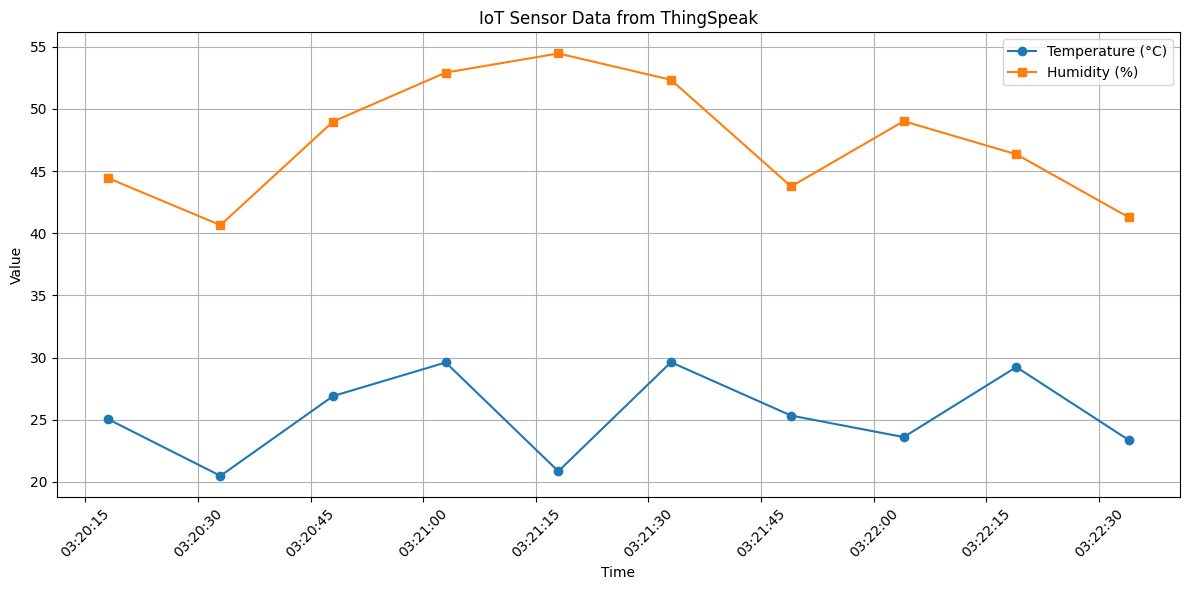

In [8]:
import requests
import random
import time
import matplotlib.pyplot as plt
from datetime import datetime

# ThingSpeak API Key
# Note: Replace these with your actual API keys and channel ID
WRITE_API_KEY = "2BP633L92JHJRV62" # Placeholder key from document
READ_API_KEY = "52YPAO3SPC89EKAJ"   # Placeholder key from document
CHANNEL_ID = "2832723"           # Placeholder ID from document

# URL for updating data
WRITE_URL = f"https://api.thingspeak.com/update" # Corrected URL format based on usage

def send_data_to_thingspeak(temperature, humidity):
    """Sends temperature and humidity data to ThingSpeak."""
    url = f'{WRITE_URL}?api_key={WRITE_API_KEY}&field1={temperature}&field2={humidity}'
    response = requests.get(url)

    if response.status_code == 200:
        print(f"Data sent successfully: Temp={temperature}°C, Humidity={humidity}%")
    else:
        print(f"Failed to send data. Status code: {response.status_code}") # Added status code for debugging

# Simulated Sensor Data Upload
for _ in range(10): # Sending 10 data points
    temp = round(random.uniform(20.0, 30.0), 2)
    hum = round(random.uniform(40.0, 60.0), 2)

    send_data_to_thingspeak(temp, hum)
    time.sleep(15) # ThingSpeak allows updates every 15 seconds

def retrieve_data_from_thingspeak():
    """Retrieves the latest data from ThingSpeak."""
    url = f'https://api.thingspeak.com/channels/{CHANNEL_ID}/feeds.json?api_key={READ_API_KEY}&results=10'
    response = requests.get(url).json()

    feeds = response['feeds']

    # Ensure feeds is not empty before processing
    if not feeds:
        print("No data retrieved from ThingSpeak.")
        return [], [], []

    timestamps = [datetime.strptime(feed['created_at'], '%Y-%m-%dT%H:%M:%SZ') for feed in feeds]
    temperatures = [float(feed['field1']) for feed in feeds]
    humidities = [float(feed['field2']) for feed in feeds]

    return timestamps, temperatures, humidities

# Retrieve and Plot Data
timestamps, temperatures, humidities = retrieve_data_from_thingspeak()

if timestamps: # Proceed only if data was retrieved
    plt.figure(figsize=(12, 6))

    plt.plot(timestamps, temperatures, label='Temperature (°C)', marker='o')
    plt.plot(timestamps, humidities, label='Humidity (%)', marker='s')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('IoT Sensor Data from ThingSpeak')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Practical 5**

In [ ]:
!pip install filterpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# Simulated Sensor Data Generation
def generate_sensor_data(n=100):
    np.random.seed(42)
    temperature = np.random.normal(25, 2, n)  # Mean 25C, Std Dev 2
    humidity = np.random.normal(50, 5, n)  # Mean 50%, Std Dev 5
    return pd.DataFrame({'Temperature': temperature, 'Humidity': humidity})

# Moving Average Filter
def moving_average_filter(data, window_size=5):
    return data.rolling(window=window_size, center=True).mean()

# Median Filter
def median_filter(data, window_size=5):
    return data.rolling(window=window_size, center=True).median()

# Threshold-Based Filtering
def threshold_filter(data, temp_range=(20, 30), hum_range=(40, 60)):
    filtered_data = data[(data['Temperature'].between(*temp_range)) &
                         (data['Humidity'].between(*hum_range))]
    return filtered_data

# Kalman Filter Implementation
def setup_kalman_filter():
    kf = KalmanFilter(dim_x=2, dim_z=1)  # State: [position, velocity], Measurement: position
    dt = 1.0  # time step
    kf.F = np.array([[1., dt], [0., 1.]])  # State transition matrix
    kf.H = np.array([[1., 0.]])  # Measurement matrix
    kf.R = np.array([[0.5]])  # Measurement noise variance
    kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.13)  # Process noise
    kf.x = np.array([[0.], [0.]])  # Initial state
    kf.P = np.array([[1., 0.], [0., 1.]])  # Initial state covariance
    return kf

def kalman_filter(data):
    kf = setup_kalman_filter()
    filtered_data = np.zeros(len(data))
    for i, measurement in enumerate(data):
        kf.predict()
        kf.update(measurement)
        filtered_data[i] = kf.x[0]
    return filtered_data

# Generate and process data
data = generate_sensor_data()
smoothed_data = moving_average_filter(data)
median_filtered_data = median_filter(data)
kalman_filtered_temp = kalman_filter(data['Temperature'].values)

# Visualization
plt.figure(figsize=(12, 8))

# Plot 1: Temperature
plt.subplot(2, 1, 1)
plt.plot(data['Temperature'], 'gray', alpha=0.5, label='Raw Temperature', linestyle='dotted')
plt.plot(smoothed_data['Temperature'], 'b', label='Moving Average', alpha=0.7)
plt.plot(median_filtered_data['Temperature'], 'g', label='Median Filter', alpha=0.7)
plt.plot(kalman_filtered_temp, 'r', label='Kalman Filter', alpha=0.7)
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Different Filtering Techniques')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Error Analysis
plt.subplot(2, 1, 2)
mae_ma = np.abs(data['Temperature'] - smoothed_data['Temperature']).mean()
mae_median = np.abs(data['Temperature'] - median_filtered_data['Temperature']).mean()
mae_kalman = np.abs(data['Temperature'] - kalman_filtered_temp).mean()
errors = [mae_ma, mae_median, mae_kalman]
plt.bar(['Moving Average', 'Median Filter', 'Kalman Filter'], errors, color=['blue', 'green', 'red'], alpha=0.6)
plt.ylabel('Mean Absolute Error')
plt.title('Error Analysis of Different Filters')
plt.tight_layout()
plt.show()

# Print error metrics
print("\nError Analysis:")
print(f"Moving Average MAE: {mae_ma:.3f}°C")
print(f"Median Filter MAE: {mae_median:.3f}°C")
print(f"Kalman Filter MAE: {mae_kalman:.3f}°C")


# **Practical 6**

In [ ]:
import hashlib
import random
import time

def hash_data(data):
    """Hashes input data using SHA-256 algorithm."""
    return hashlib.sha256(data.encode()).hexdigest()

def verify_hash(original_data, hashed_data):
    """Verifies whether the hash of the given data matches the stored hash."""
    try:
        return hash_data(original_data) == hashed_data
    except Exception as e: # Added basic exception handling
        print(f"Error during verification: {e}")
        return False

# Simulate generating and hashing data indefinitely until interrupted
try:
    while True:
        # Generate random IoT sensor data
        temperature = round(random.uniform(20.0, 30.0), 1)
        humidity = random.randint(40, 80)
        sensor_data = f"Temperature: {temperature}°C, Humidity: {humidity}%"

        # Apply Hashing
        hashed_data = hash_data(sensor_data)
        verification = verify_hash(sensor_data, hashed_data)

        # Print results
        print("\nOriginal Data:", sensor_data)
        print("Hashed Data:", hashed_data)
        print("Verification Successful:", verification)

        # Pause before generating new data
        time.sleep(2)

except KeyboardInterrupt:
    print("\nProcess stopped by user.")

# **Practical 7**

> ⚠️ if this practical is being asked, run this practical in new colab, otherwise it will give error due to dependencies issue from other practicals in this same colab.

In [ ]:
!pip install flask pyngrok # install libraries required

from flask import Flask, request, jsonify

app = Flask(__name__)

device_state = {"LED": "OFF"} # Initial state of the virtual IoT device

@app.route('/')
def home():
    """Displays instructions on how to use the API."""
    return "<h1>IoT Device Control</h1><p>Use /control?device=LED&state=ON to control the device.</p>"

@app.route('/control', methods=['GET'])
def control_device():
    """Handles device control requests."""
    device = request.args.get('device')
    state = request.args.get('state')

    if device in device_state and state in ["ON", "OFF"]:
        device_state[device] = state
        return jsonify({"message": f"{device} turned {state}"})
    else:
        return jsonify({"error": "Invalid device or state"})

@app.route('/status', methods=['GET'])
def device_status():
    """Returns the current state of the device(s)."""
    return jsonify(device_state)

if __name__ == '__main__':
    # This runs the Flask development server.
    # For production, use a more robust server like Gunicorn or uWSGI.
    app.run(host='0.0.0.0', port=5000)

# **Practical 8**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset with 1000 samples
num_samples = 1000

# Simulate sensor readings
temperature = np.random.randint(30, 100, num_samples)  # Temperature in Celsius
vibration = np.round(np.random.uniform(0.1, 3.0, num_samples), 2)  # Vibration level
pressure = np.random.randint(50, 400, num_samples)  # Pressure in kPa
humidity = np.random.randint(20, 80, num_samples)  # Humidity in %
machine_age = np.random.randint(1, 20, num_samples)  # Machine age in years

# Generate failure labels (1 = Failure, 0 = No Failure) based on conditions
failure = np.where(
    (temperature > 80) & (vibration > 2.0) & (pressure > 300) & (humidity > 60),
    1,  # High failure risk
    np.random.choice([0, 1], size=num_samples, p=[0.85, 0.15])  # 15% random failures
)

# Create DataFrame
df = pd.DataFrame({
    "Temperature": temperature,
    "Vibration": vibration,
    "Pressure": pressure,
    "Humidity": humidity,
    "Machine_Age": machine_age,
    "Failure": failure
})

# Save dataset as CSV file
csv_filename = "iot_sensor_data.csv"
df.to_csv(csv_filename, index=False)
print(f"Dataset generated and saved as '{csv_filename}' successfully!")

# Display first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Load dataset (if running separately)
df = pd.read_csv("iot_sensor_data.csv")

# Split dataset into features and labels
X = df.drop(columns=['Failure'])  # Features
y = df['Failure']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Model Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization for Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance Analysis for Random Forest
feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic IoT sensor data
num_samples = 1000
iot_data = pd.DataFrame({
    "Temperature": np.random.randint(30, 100, num_samples),
    "Vibration": np.round(np.random.uniform(0.1, 3.0, num_samples), 2),
    "Pressure": np.random.randint(50, 400, num_samples),
    "Humidity": np.random.randint(20, 80, num_samples),
    "Machine_Age": np.random.randint(1, 20, num_samples)
})

# Generate Failure labels (1 = Failure, 0 = No Failure)
failure = np.where(
    (iot_data['Temperature'] > 80) &
    (iot_data['Vibration'] > 2.0) &
    (iot_data['Pressure'] > 300) &
    (iot_data['Humidity'] > 60),
    1,
    np.random.choice([0, 1], num_samples, p=[0.85, 0.15])
)
iot_data['Failure'] = failure

# Split data into features and labels
X = iot_data.drop(columns=['Failure'])
y = iot_data['Failure']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
rf_predictions = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

# Generate and plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IoT Failure Prediction (Random Forest)")
plt.show()

# Feature importance visualization
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in IoT Failure Prediction (Random Forest)")
plt.show()

# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the neural network
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Model Accuracy: {nn_accuracy * 100:.2f}%")

# Predictions and confusion matrix for Neural Network
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")
conf_matrix_nn = confusion_matrix(y_test, nn_predictions)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IoT Failure Prediction (Neural Network)")
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Compare Model Accuracies
comparison_data = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_rf * 100, nn_accuracy * 100]
})
print(comparison_data)

sns.barplot(x='Model', y='Accuracy', data=comparison_data)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()
